In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import binned_statistic as bin_mean
from scipy.interpolate import make_interp_spline
files = ['Glauber','Metropolis']

In [22]:
raw_data = [pd.read_csv("./"+ f+"_data.csv") for f in files]
#rawData=pd.read_csv("./Average_data.csv")

qs = [2,5]#np.unique(raw_data[0]['q'])
data_Sets = []
max_ps = 0
for q in qs:
    print(q)

    q_set = [(set.loc[set['q']== q]) for set in raw_data]
    
    data_Sets.append(q_set)


2
5


In [23]:
def metric(c_in, c_out,c,q,n):
    return (c_in-c_out)/(q*c**0.5)

In [24]:
def binning(X,Y,bin = 9):
    mean,edges,_ = bin_mean(X,Y,bins=bin)
    Y_ret = mean
    X_ret = edges[1::]

    return X_ret, Y_ret
    

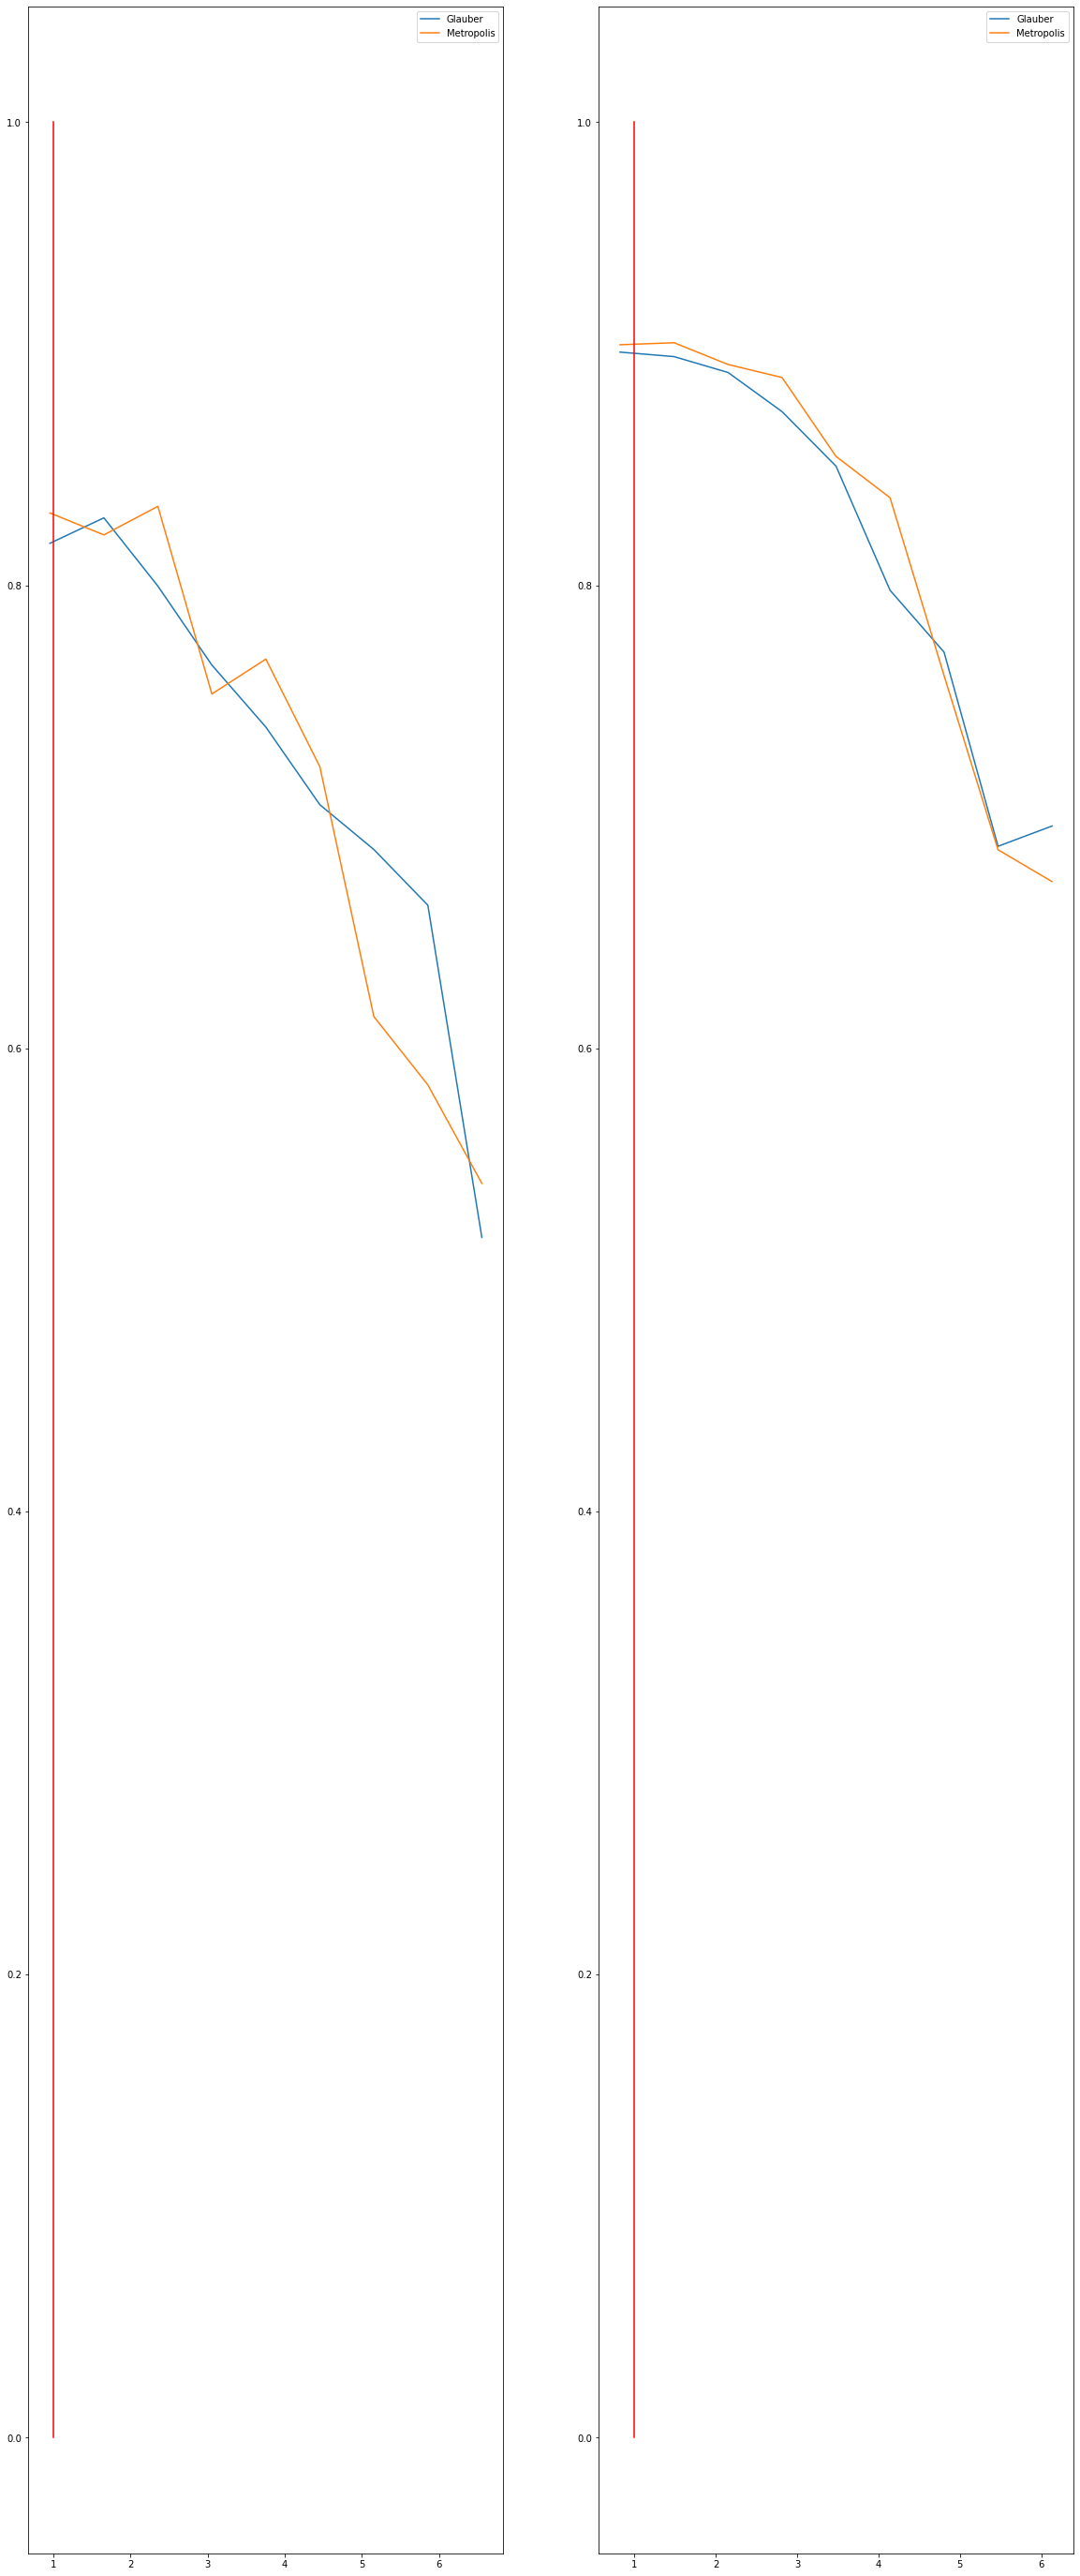

In [29]:
fig,ax = plt.subplots(1,2,figsize = (20,10))
ax.flatten()

for i,set in enumerate(data_Sets):
    xs = []
    ys = []
    
    for df in set:
        Xs = []
        Ys = []
        for index,row in df.iterrows():
            c_in = row['n'] * row['p_in']
            c_out = row['n'] * row['p_out']
            q = row['q']
            n = row['n']

            c = (c_in +(row['q'] -1)*c_out) / row['q']

            repeat_Xs = []
            repeat_Ys = []
            for s in ['1','2','3','4','5']:
                repeat_Ys.append(row[s])

            Xs.append(metric(c_in,c_out,c,q,n))
            y_calc = (q*np.mean(repeat_Ys) -1)/(q-1)
            Ys.append(y_calc)#np.mean(repeat_Ys))

        Xs,Ys = binning(Xs,Ys)

        xs.append(Xs)
        ys.append(Ys)

    k_s =1#row['q']

    
    #ax[i].plot(xs,ys)
    for x,y,f in zip(xs,ys,files):
        ax[i].plot(x,y,label = f)
    ax[i].plot([k_s,k_s],[0,1],c='r')
    ax[i].legend()


